# scratch

In [4]:
import sys
sys.path.append('../..')

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import read_image
%matplotlib inline

## write image to disk 

In [56]:
img_path = '../../../data/raw/png/ordered_boards_3x3/diST_all.png'

In [57]:
img = read_image(img_path)

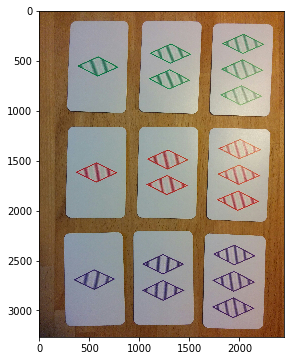

In [64]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(img);

In [59]:
from segmentboard.segmentboard import turn

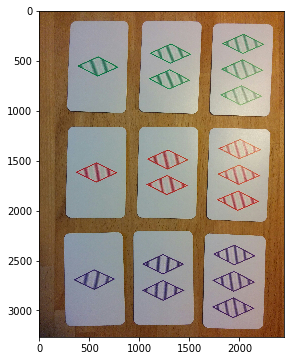

In [66]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(turn(img, orient='portrait'));

In [26]:
import imageio

In [32]:
%%time
imageio.imwrite("test_write.png", img, compress_level=0)

CPU times: user 378 ms, sys: 16.6 ms, total: 395 ms
Wall time: 396 ms


In [39]:
%%time
imageio.imwrite("test_write3.jpg", img, compress_level=9)

CPU times: user 196 ms, sys: 8.14 ms, total: 204 ms
Wall time: 204 ms


In [40]:
%ls -lh

total 9944
-rw-r--r--  1 ivankeller  staff   1.5M Nov 13 11:29 scratch.ipynb
-rw-r--r--  1 ivankeller  staff   1.5M Jul 13  2017 scratch_dev.ipynb
-rw-r--r--  1 ivankeller  staff   8.0K Sep 10  2017 test scratch.ipynb
-rw-r--r--  1 ivankeller  staff   611K Nov 13 11:30 test_write.jpg
-rw-r--r--  1 ivankeller  staff   611K Nov 13 11:30 test_write2.jpg
-rw-r--r--  1 ivankeller  staff   611K Nov 13 11:30 test_write3.jpg


In [35]:
%ls -lh $img_path

-rw-r--r--@ 1 ivankeller  staff   7.5M May 20  2017 ../../../data/raw/png/ordered_boards_3x3/diST_all.png


In [52]:
img = np.arange(18).reshape((2, 3, 3))
img

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

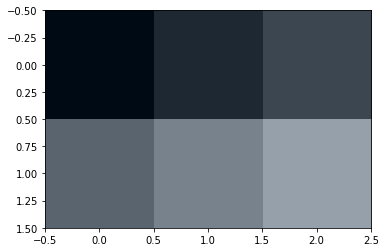

In [53]:
plt.imshow(img*10)

In [54]:
rot_img = np.rot90(img)
rot_img

array([[[ 6,  7,  8],
        [15, 16, 17]],

       [[ 3,  4,  5],
        [12, 13, 14]],

       [[ 0,  1,  2],
        [ 9, 10, 11]]])

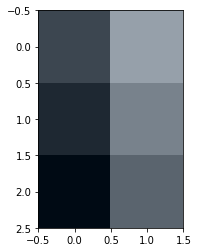

In [55]:
plt.imshow(rot_img*10)

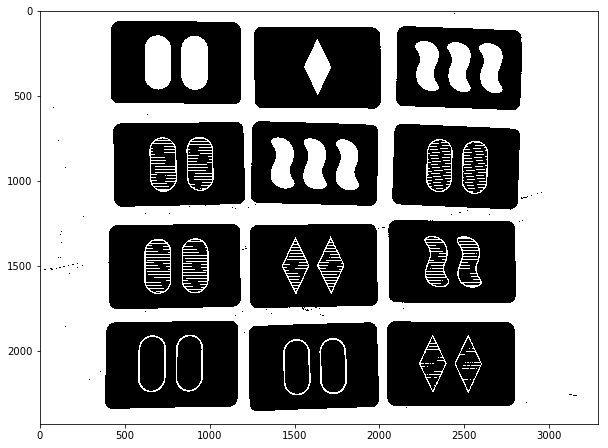

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
fig = plt.figure(figsize=(10, 12))
plt.imshow(thresh, cmap=plt.cm.gray);
#plt.imshow(gray, cmap=plt.cm.gray);

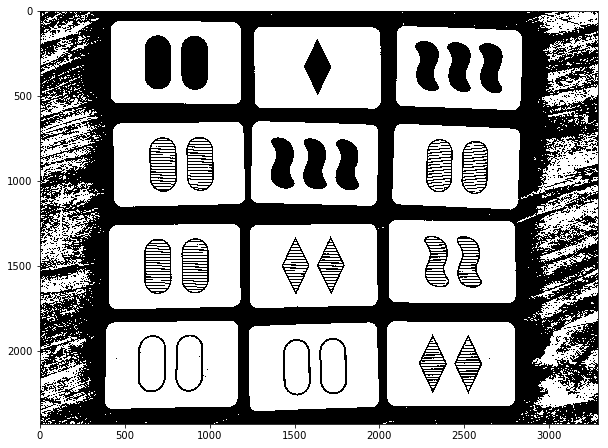

In [25]:
adapt_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 355, 0)
fig = plt.figure(figsize=(10, 12))
plt.imshow(adapt_thresh, cmap=plt.cm.gray);
#plt.imshow(gray, cmap=plt.cm.gray);

In [7]:
np.min(gray)

0

### image manipulation with scipy and numpy

In [64]:
from scipy.misc import imread

In [65]:
cards_colour = imread(img_path, flatten=False)
cards = imread(img_path, flatten=True)

In [66]:
cards_colour.shape

(3264, 2448, 3)

In [67]:
cards_colour.dtype

dtype('uint8')

In [68]:
cards_colour[1000, 1000, :]

array([170, 180, 181], dtype=uint8)

In [69]:
cards_colour[1000, 1000, :].mean()

177.0

In [70]:
cards.shape

(3264, 2448)

In [71]:
cards[1000, 1000]

177.12399

In [72]:
cards.dtype

dtype('float32')

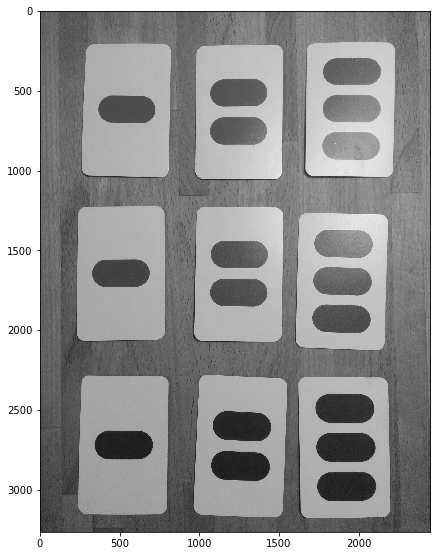

In [73]:
plt.figure(figsize=(7, 15))
plt.imshow(cards, cmap=plt.cm.gray)

In [74]:
# collapse rows and columns
mean_row = cards.mean(axis=0)
mean_col = cards.mean(axis=1)

### mean row

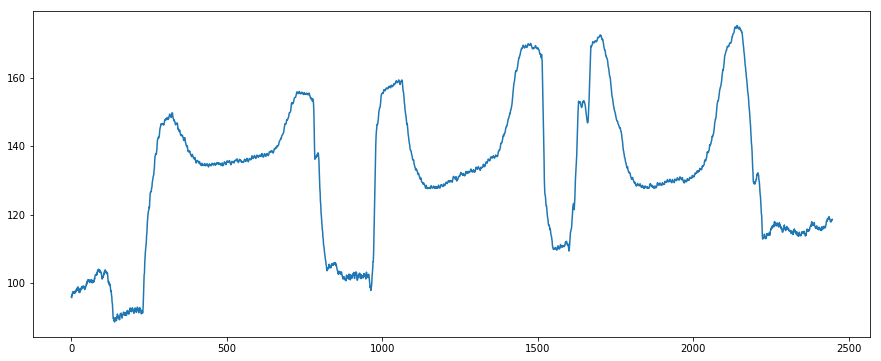

In [75]:
# plot mean row
plt.figure(figsize=(15, 6))
plt.plot(mean_row);

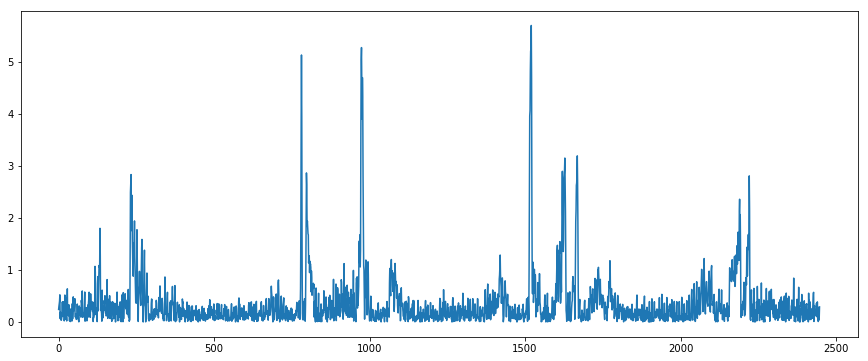

In [76]:
# abs derivative mean row
plt.figure(figsize=(15, 6))
plt.plot(np.abs(np.gradient(mean_row)));

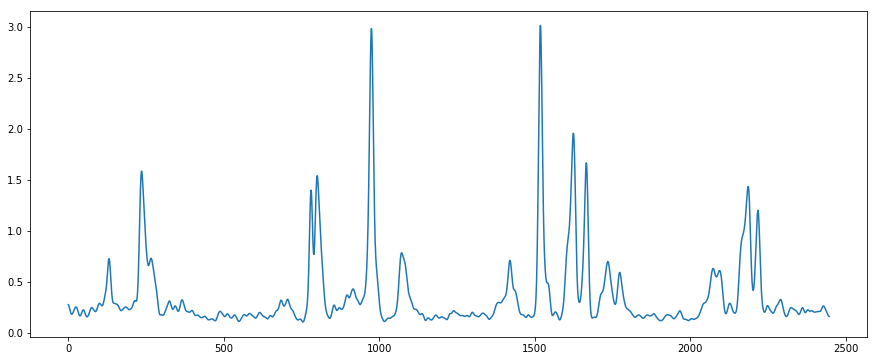

In [77]:
# smooth abs derivative mean row
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(np.abs(np.gradient(mean_row)), 5));

### mean column

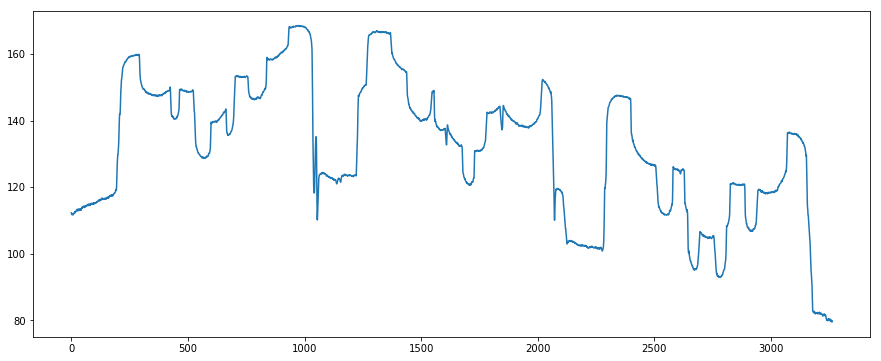

In [78]:
plt.figure(figsize=(15, 6))
plt.plot(mean_col);

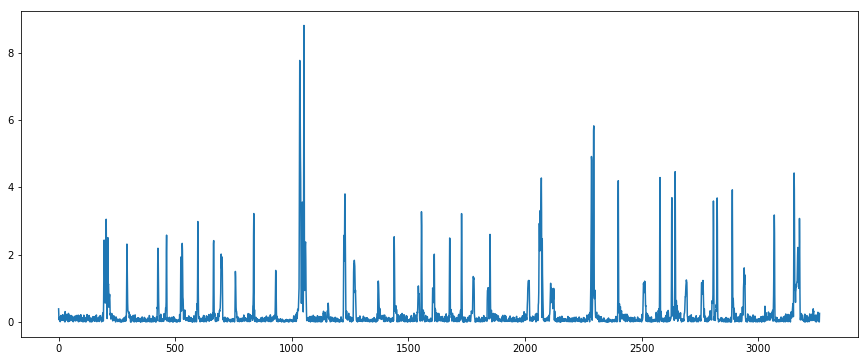

In [79]:
# abs derivative mean column
plt.figure(figsize=(15, 6))
plt.plot(np.abs(np.gradient(mean_col)));

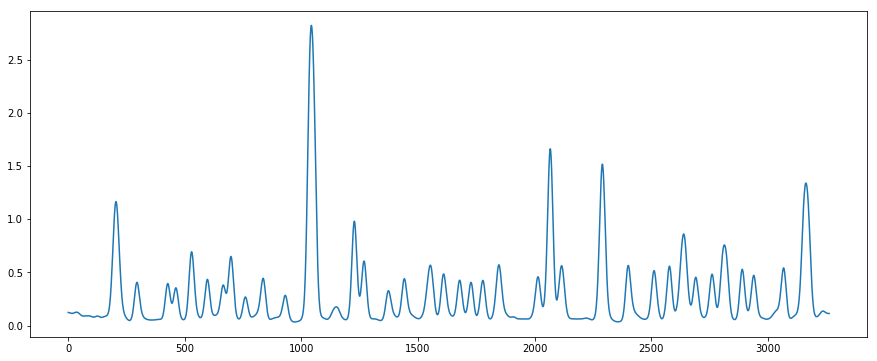

In [80]:
# smooth abs derivative mean col
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(np.abs(np.gradient(mean_col)), 10));

### idem with thresh

In [81]:
# collapse rows and columns
thresh_mean_row = thresh.mean(axis=0)
thresh_mean_col = thresh.mean(axis=1)

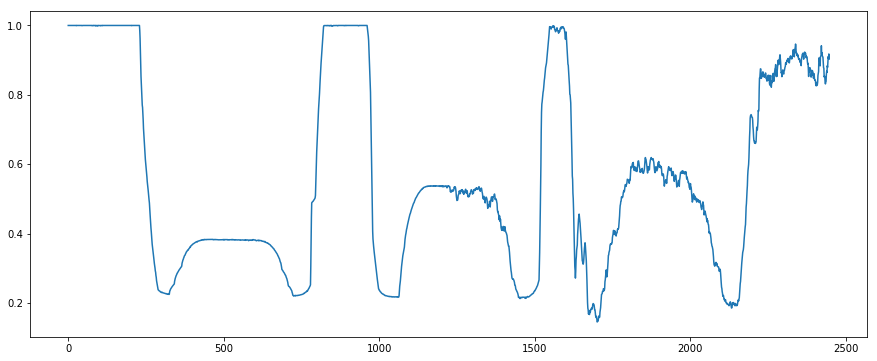

In [82]:
# plot mean row
plt.figure(figsize=(15, 6))
plt.plot(thresh_mean_row);

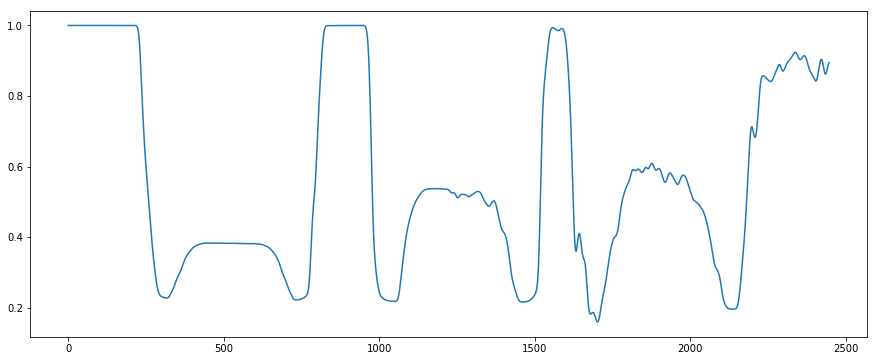

In [87]:
# plot mean row
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(thresh_mean_row, 5));

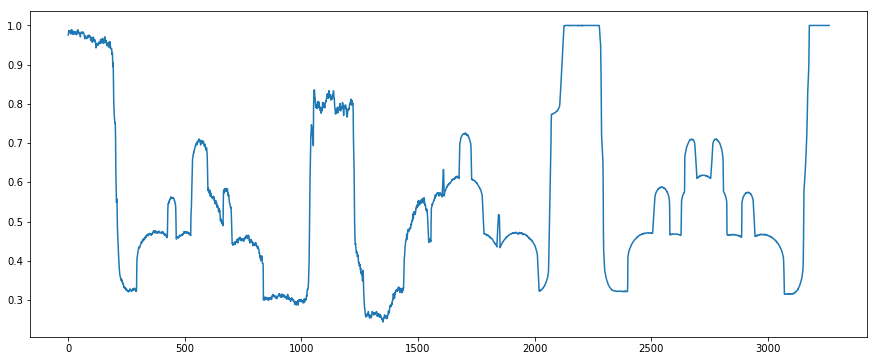

In [83]:
# plot mean col
plt.figure(figsize=(15, 6))
plt.plot(thresh_mean_col);

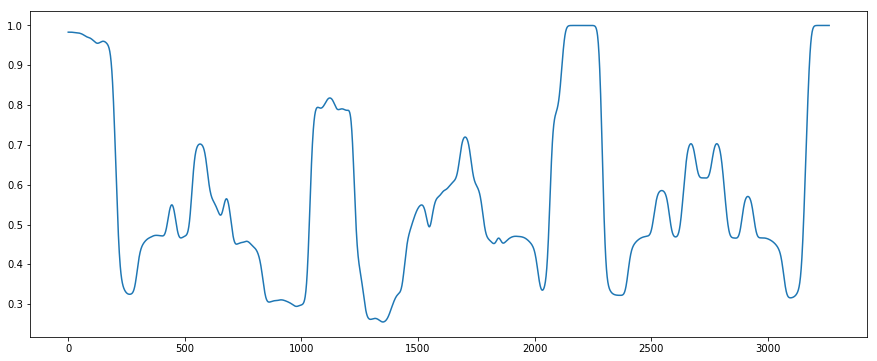

In [89]:
# plot mean col
plt.figure(figsize=(15, 6))
plt.plot(gaussian_filter1d(thresh_mean_col, 10));

In [26]:
a = np.array([0, 0, 1, 1, 1, 0])

In [27]:
a[1:]

array([0, 1, 1, 1, 0])

In [28]:
a[:-1]

array([0, 0, 1, 1, 1])

In [33]:
flips = np.argwhere(np.logical_xor(a[1:], a[:-1]))
flips

array([[1],
       [4]])

In [34]:
a[flips]

array([[0],
       [1]])